In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [62]:
housing=pd.read_csv("housing.csv")

<h2>Getting a Brief overview of the Data </h2>

In [63]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [64]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [65]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [66]:
housing.describe()
# provdies a descriptive overview of the Numeric features/rows of the dataset 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<h2>checking for null values</h2>

In [67]:
print(housing.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

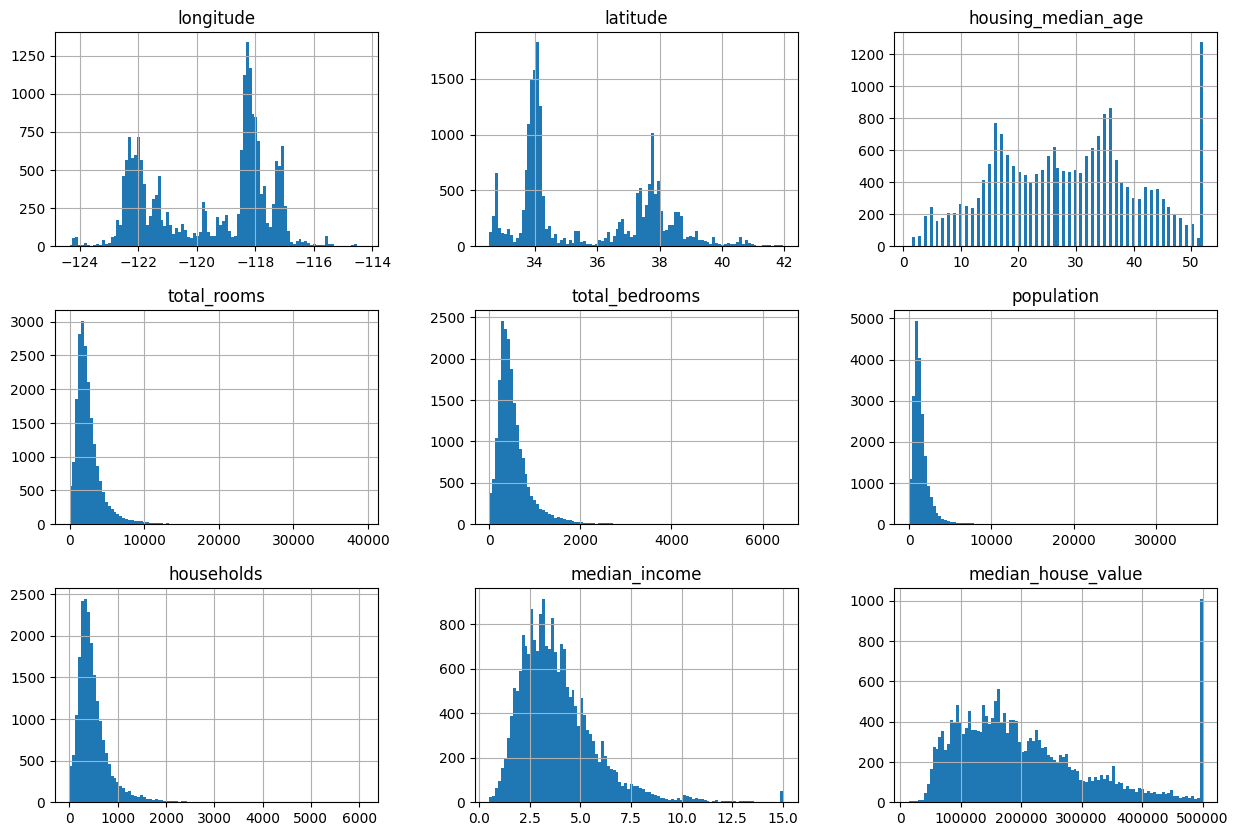

In [68]:
housing.hist(bins=100,figsize=(15,10))


<h1>Creating a Test Set</h1>

In [69]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(housing,random_state=42,test_size=0.2,shuffle=True)

In [70]:
len(train)

16512

In [71]:
housing["income_cat"]=pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

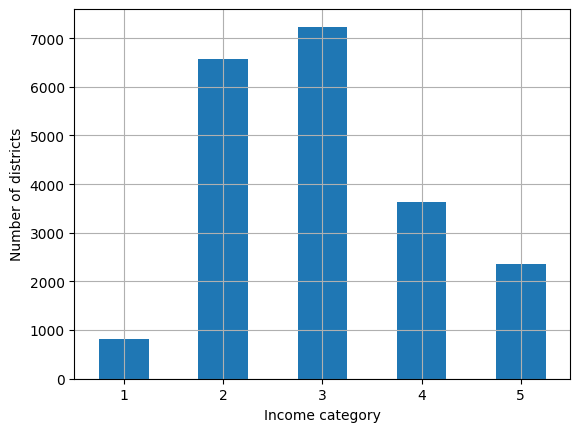

In [72]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [73]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_splits=[]
splitter = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=21)
for train_index,test_index in splitter.split(housing,housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n,strat_test_set_n])


In [74]:
strat_train_set_n,strat_test_set_n=strat_splits[0]

In [75]:
strat_train_set,strat_test_set=train_test_split(housing,test_size=0.25,stratify=housing["income_cat"],random_state=21)

In [76]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)
#Normalizing the values

3    0.350581
2    0.318798
4    0.176357
5    0.114535
1    0.039729
Name: income_cat, dtype: float64

In [77]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [78]:
housing=strat_train_set.copy()

<h2>Discover and Visualize the Data to Gain Insights</h2>

c:\Users\ssing\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


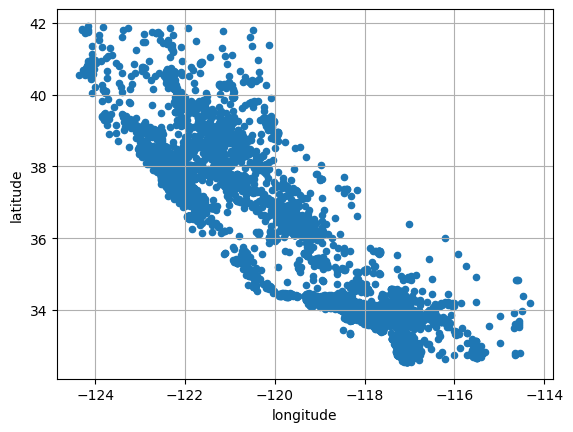

In [79]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True)
plt.show()

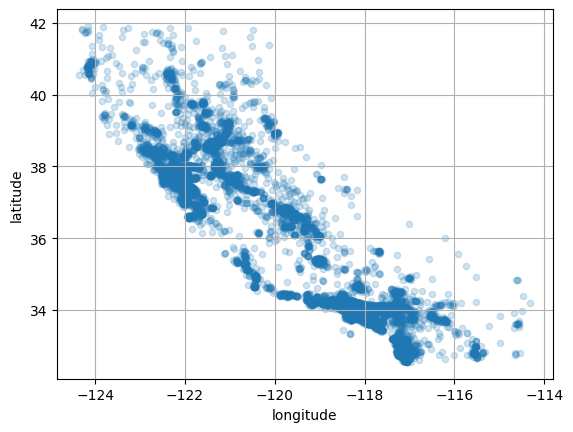

In [80]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,alpha=0.2)
plt.show()

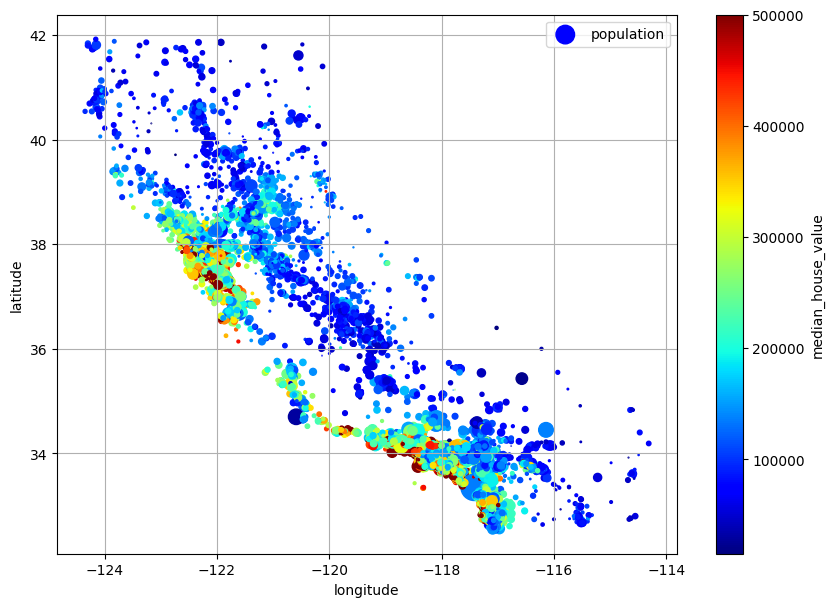

In [81]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
 s=housing["population"] / 100, label="population",
 c="median_house_value", cmap="jet", colorbar=True,
 legend=True, sharex=False, figsize=(10, 7))
plt.show()

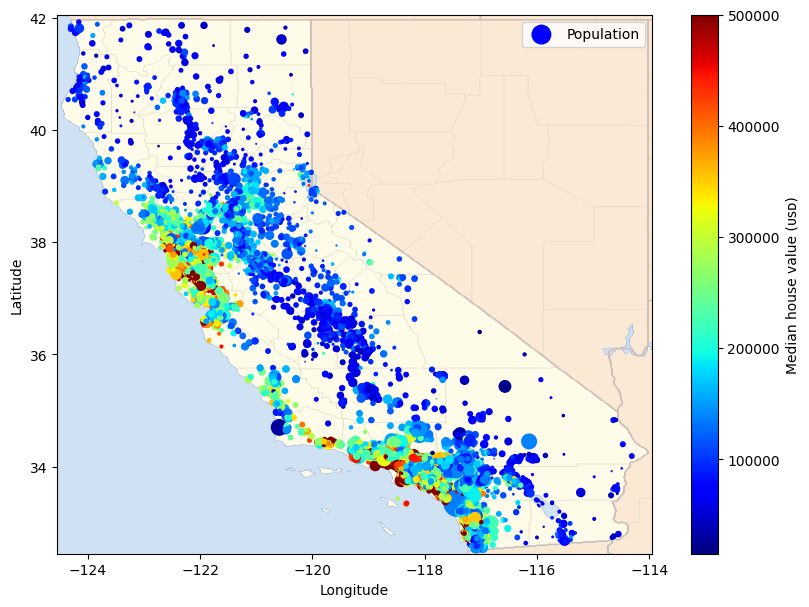

In [82]:
from pathlib import Path
import urllib.request
import matplotlib.pyplot as plt

filename = "california.png"
if not Path(filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, filename)

# Assuming 'housing' DataFrame is already loaded
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"
})

housing_renamed.plot(
    kind="scatter", x="Longitude", y="Latitude",
    s=housing_renamed["Population"] / 100, label="Population",
    c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
    legend=True, sharex=False, figsize=(10, 7)
)

california_img = plt.imread(filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis, alpha=0.5)

plt.show()


<h2>checking for correlation</h2> 

In [83]:
corr_matrix=housing.corr()

In [84]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689460
total_rooms           0.134665
housing_median_age    0.104420
households            0.065449
total_bedrooms        0.048853
population           -0.025698
longitude            -0.048700
latitude             -0.140325
Name: median_house_value, dtype: float64

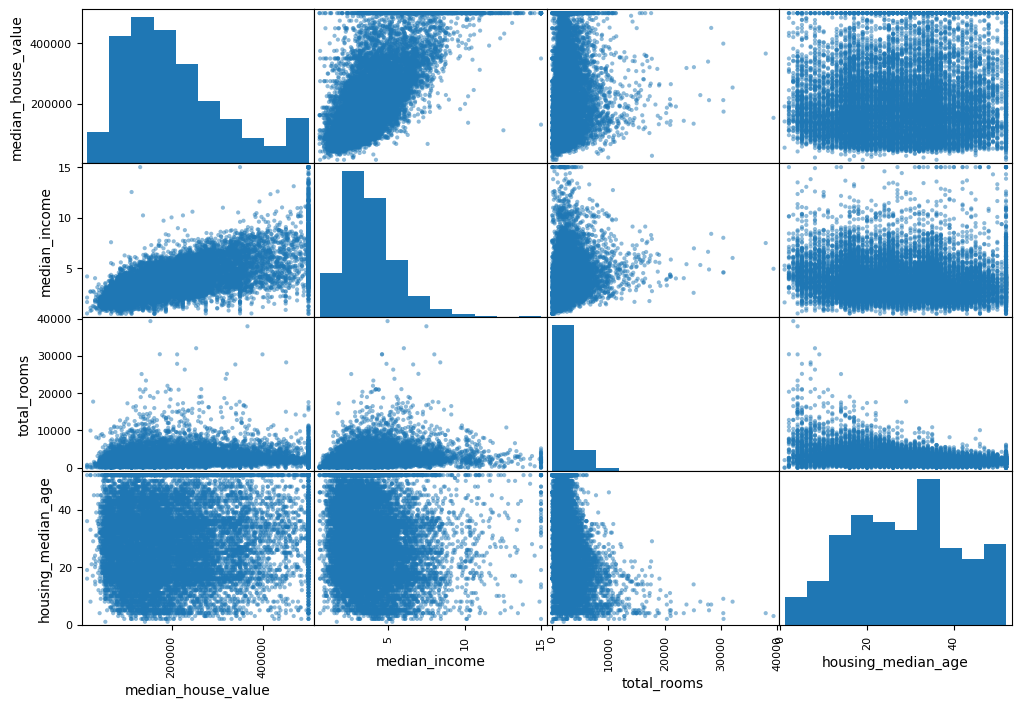

In [85]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

<h2>Experimenting with Attribute Combinations</h2>

In [86]:
housing["rooms_per_house"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_ratio"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["people_per_house"]=housing["population"]/housing["households"]

In [87]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689460
rooms_per_house       0.144739
total_rooms           0.134665
housing_median_age    0.104420
households            0.065449
total_bedrooms        0.048853
people_per_house     -0.021863
population           -0.025698
longitude            -0.048700
latitude             -0.140325
bedrooms_ratio       -0.256483
Name: median_house_value, dtype: float64

<h2>Preparing data for training</h2>

In [88]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

In [89]:
housing_labels

11688     75000.0
5922     192800.0
5156     140600.0
5345     107600.0
7190     344900.0
           ...   
16312    220000.0
19639     59100.0
13000    339800.0
3253     241400.0
9502     187500.0
Name: median_house_value, Length: 15480, dtype: float64

<h3>cleaning the data</h3>

In [116]:
null_rows_idx = housing[housing["total_bedrooms"].isnull()].index

housing_option3 = housing.copy()

median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace=True)  # option 3

housing_option3.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16273,-122.08,37.37,29.0,1229.0,433.0,707.0,194.0,7.1108,NEAR BAY
15903,-122.39,37.60,34.0,707.0,433.0,381.0,156.0,4.3750,NEAR OCEAN
16478,-122.00,37.36,17.0,2070.0,433.0,797.0,275.0,8.6155,<1H OCEAN
18241,-121.44,38.54,39.0,2855.0,433.0,1217.0,562.0,3.2404,INLAND
9750,-117.14,32.90,16.0,3217.0,433.0,2054.0,687.0,4.2234,<1H OCEAN


In [90]:
# median=housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median,inplace=True)

#data imputation for missing values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")# imputation is only perfromed for numeric attributes


In [91]:
housing_numeric=housing.select_dtypes(include=[np.number])
imputer.fit(housing_numeric)

SimpleImputer(strategy='median')

In [92]:
imputer.statistics_
housing_numeric.median().values

array([-118.51  ,   34.26  ,   29.    , 2123.    ,  433.    , 1162.    ,
        408.    ,    3.5288])

<h3>Transform the training set</h3>

In [93]:
X=imputer.transform(housing_numeric)

In [120]:
housing_tr = pd.DataFrame(X, columns=housing_numeric.columns,
                          index=housing_numeric.index)

In [123]:
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16273,-122.08,37.37,29.0,1229.0,433.0,707.0,194.0,7.1108
15903,-122.39,37.60,34.0,707.0,433.0,381.0,156.0,4.3750
16478,-122.00,37.36,17.0,2070.0,433.0,797.0,275.0,8.6155
18241,-121.44,38.54,39.0,2855.0,433.0,1217.0,562.0,3.2404
9750,-117.14,32.90,16.0,3217.0,433.0,2054.0,687.0,4.2234


In [125]:
imputer.strategy

'median'

In [126]:
from sklearn.ensemble import IsolationForest
isolation_forest =IsolationForest(random_state=42)
outlier_pred=isolation_forest.fit_predict(X)

In [127]:
outlier_pred

array([ 1,  1,  1, ...,  1,  1, -1])

In [128]:
# Dropping Outliers
housing = housing.iloc[outlier_pred == 1]
housing_labels = housing_labels.iloc[outlier_pred == 1]

<h3>Handling text and cateegorical attributes</h3>

In [95]:
housing_cat=housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
11688,INLAND
5922,INLAND
5156,NEAR OCEAN
5345,INLAND
7190,<1H OCEAN


In [96]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [97]:
housing_cat_encoded

array([[1.],
       [1.],
       [4.],
       ...,
       [4.],
       [0.],
       [1.]])

In [98]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [99]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

In [100]:
housing_cat_1hot.toarray()#converting scipy sparse matrix to numpy array 

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [101]:
# can also use pd.get_dummies but one hot encoder remains the values it has been trained on 

In [129]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,1,0
1,0,1


In [130]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

<2x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [102]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [103]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [104]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

<h2>Feature Scaling</h2>

In [105]:
from sklearn.preprocessing import MinMaxScaler

min_max_Scaler=MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_Scaled=min_max_Scaler.fit_transform(housing_numeric)

In [106]:
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler()
housing_num_std_scaled=std_scaler.fit_transform(housing_numeric)

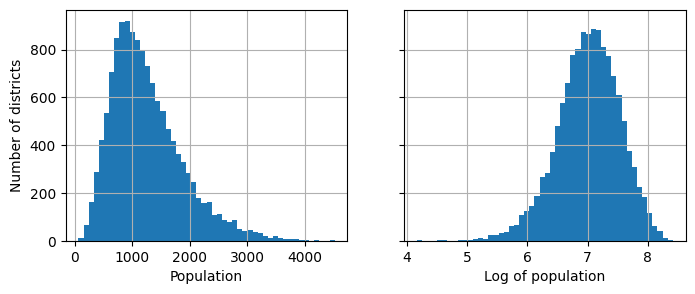

In [131]:
# checking for data distribution 
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")

plt.show()

In [107]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 =rbf_kernel(housing[["housing_median_age"]],[[35]],gamma=0.1)


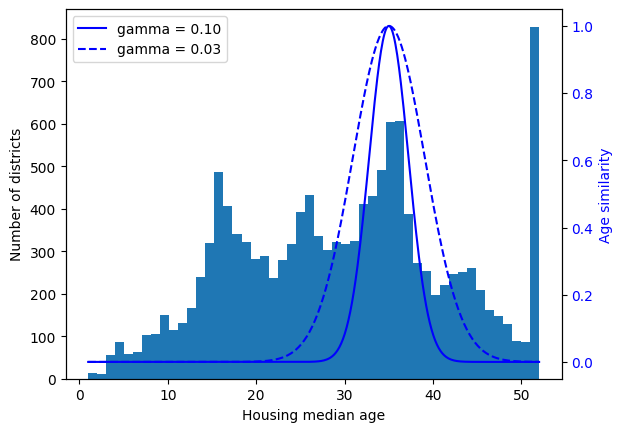

In [132]:
# extra code – Plotting for age simimlarity

ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
plt.show()

In [108]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())
model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data
scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [134]:
from sklearn.compose import TransformedTargetRegressor
modle= TransformedTargetRegressor(LinearRegression(),transformer=StandardScaler())

model.fit(housing[["median_income"]],housing_labels)
predictions=model.predict(some_new_data)

In [133]:
predictions

array([129916.90320035, 232173.3005119 , 148655.33953895, 196824.83772021,
       377528.94433684])

<h2>Custom Transformers</h2>

In [110]:
from sklearn.preprocessing import FunctionTransformer

log_transformer =FunctionTransformer(np.log,inverse_func=np.exp)
log_population =log_transformer.transform(housing[["population"]])

In [135]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [136]:
age_simil_35

array([[0.02732372],
       [0.20189652],
       [0.00166156],
       ...,
       [1.        ],
       [0.02732372],
       [0.02732372]])

In [111]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

In [137]:
sf_simil

array([[0.87077958],
       [0.0263165 ],
       [0.00478131],
       ...,
       [0.03275557],
       [0.06365219],
       [0.01223218]])

In [112]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.utils.validation import check_array,check_is_fitted

class StandardScalerClone(BaseEstimator,TransformerMixin):
    def __init__(self,with_mean=True):
        self.with_mean=with_mean

    def fit(self,X,y=None):
        X=check_array(X)
        self.mean_=X.mean(axis=0)
        self.scale_=X.std(axis=0)
        self.n_features_in_=X.shape[1]

    def transform(self,X):
       check_is_fitted(self)
       X=check_array(X)
       assert self.n_features_in_ == X.shape[1]
       if self.with_mean:
           X=X-self.mean_
       return X/self.scale_ 

In [113]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator,TransformerMixin):
    def __init__(self,n_clusters=10,gamma=1.0,random_state=None):
        self.n_clusters=n_clusters
        self.gamma=gamma
        self.random_state=random_state

    def fit(self,X,y=None,sample_weight=None):
        self.kmeans_=KMeans(self.n_clusters,random_state=self.random_state)
        self.kmeans_.fit(X,sample_weight=sample_weight)
        return self
    
    def transform(self,X):
        return rbf_kernel(X,self.kmeans_.cluster.centers_,gamma=self.gamma)
    
    def get_feature_names_out(self,name=None):
        return[f"Cluster {i} similarity" for i in range(self.n_clusters)]


In [145]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
similarities = kmeans.fit_transform(housing[["latitude", "longitude"]],
                                           sample_weight=housing_labels)

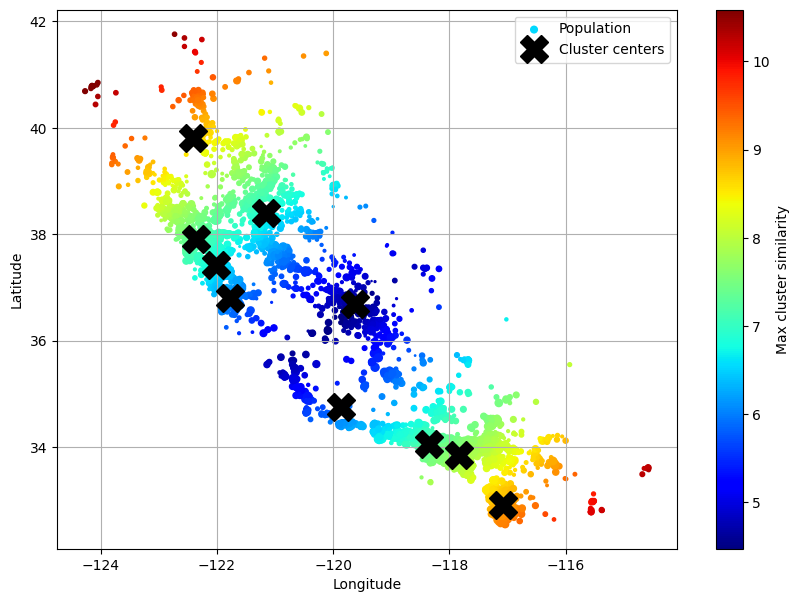

In [146]:
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")

plt.show()